In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
import os
import numpy as np
from DataLoader3 import load_images_from_selected_classes

# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)

Generating augmented grayscale images for class: Apple Braeburn


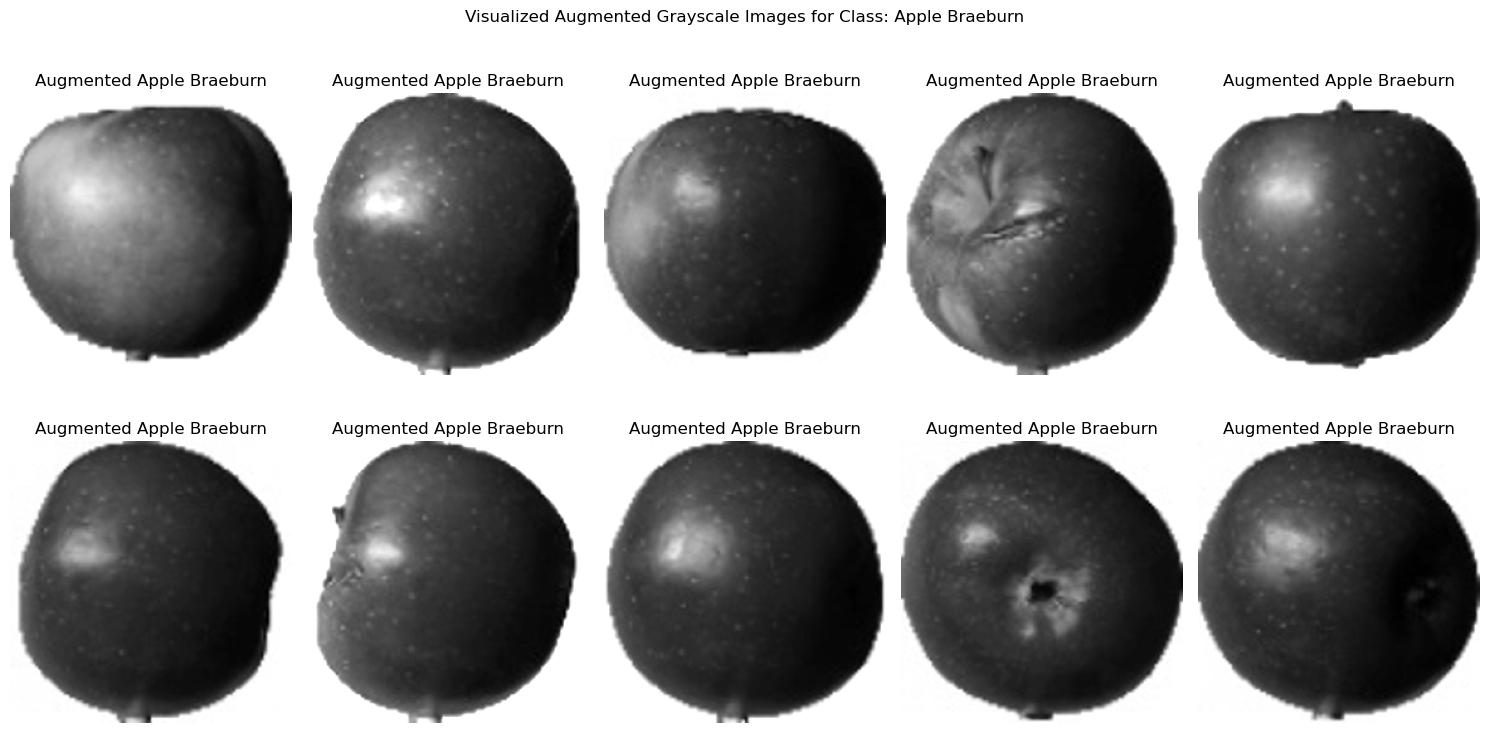

Generating augmented grayscale images for class: Banana


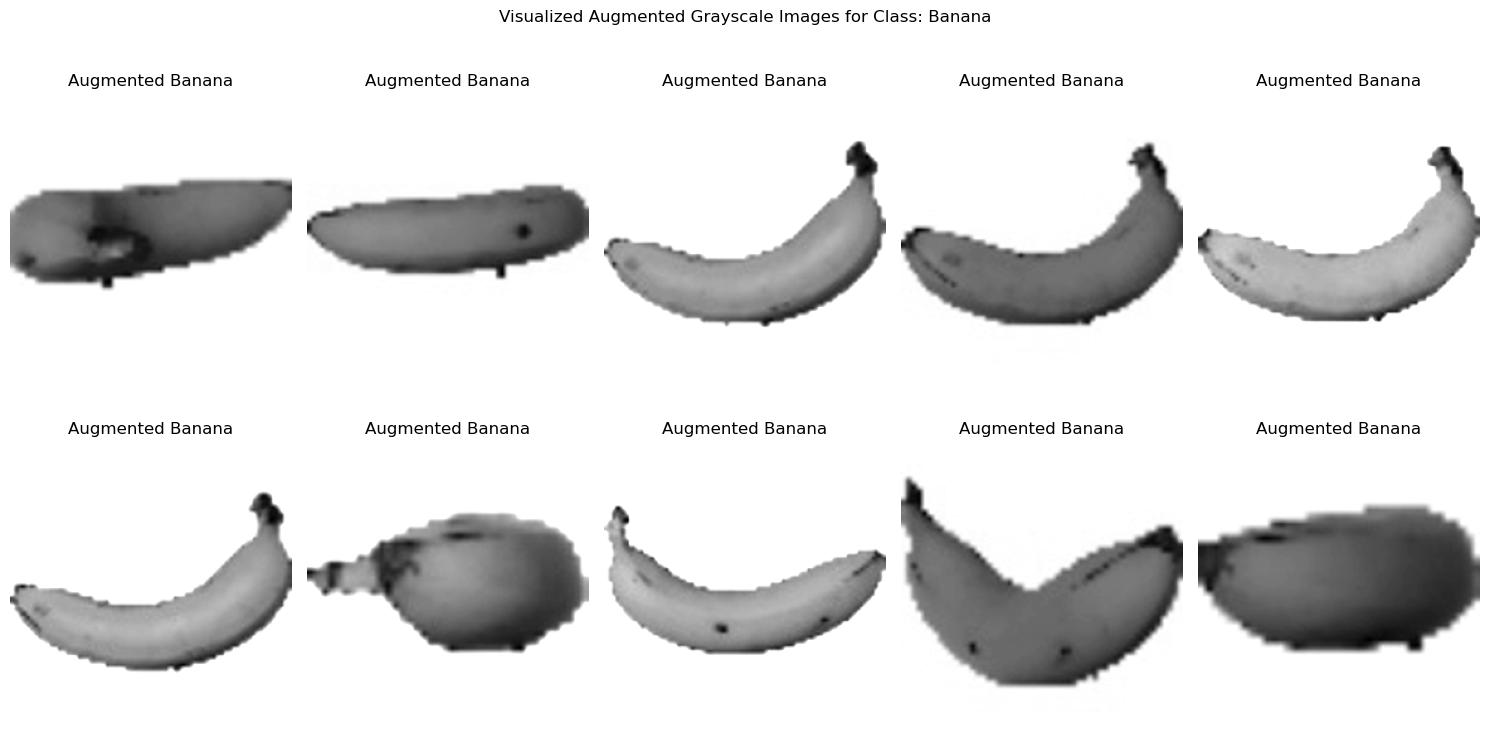

Generating augmented grayscale images for class: Lemon


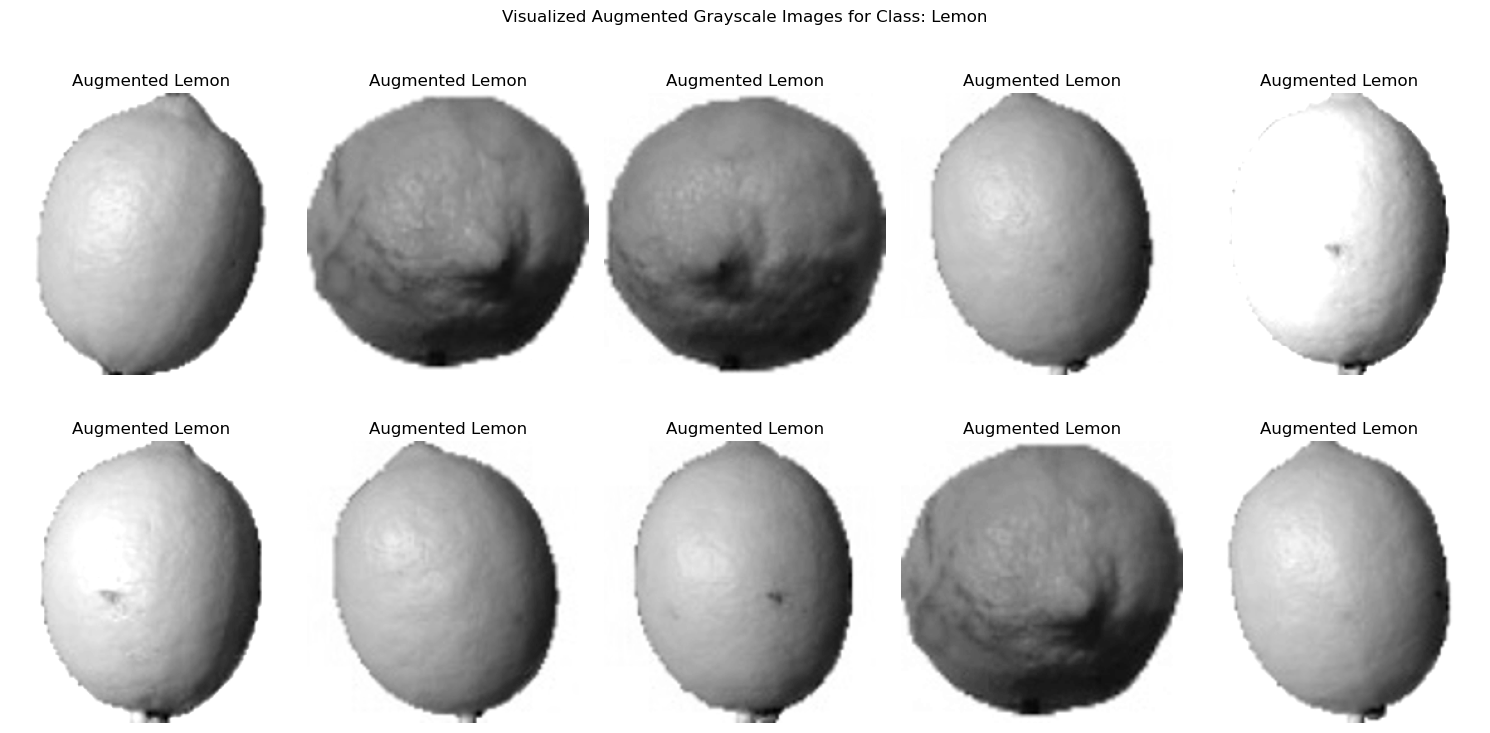

Generating augmented grayscale images for class: Limes


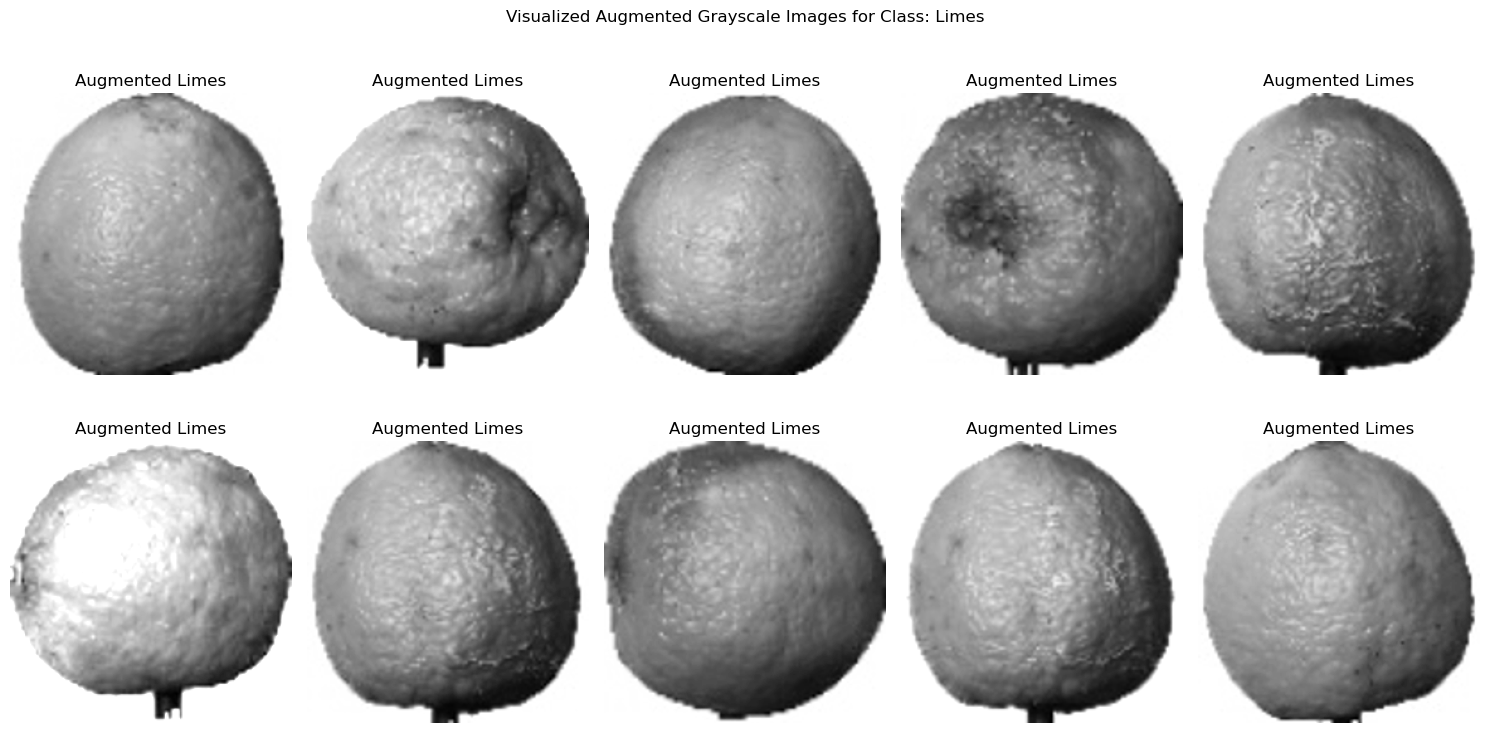

Shape of augmented_gray_images array: (400, 224, 224)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to convert RGB images to grayscale
def rgb_to_grayscale(images):
    gray_images = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray_image)
    return np.array(gray_images)

# Initialize the ImageDataGenerator with grayscale augmentation parameters
datagen = ImageDataGenerator(
    brightness_range=[0.5, 1.5],  # Adjust brightness level
)

# Generate augmented grayscale images for each class and save them in a new array
augmented_gray_images = []

# Visualization parameters
num_visualized_per_class = 10
num_columns = 5  # Number of columns to display for visualization

for class_name, images in images_array_dict.items():
    print(f"Generating augmented grayscale images for class: {class_name}")
    
    # Convert RGB images to grayscale
    gray_images = rgb_to_grayscale(images)
    
    # Reshape grayscale images to rank 4 tensor
    gray_images = gray_images.reshape(gray_images.shape[0], gray_images.shape[1], gray_images.shape[2], 1)
    
    # Initialize generator for this class
    generator = datagen.flow(gray_images, batch_size=1, shuffle=False)
    
    # Generate and store augmented images
    num_generated_images = 0
    for batch in generator:
        augmented_image = batch[0]
        augmented_gray_images.append(augmented_image[:, :, 0])  # Save the grayscale image
        num_generated_images += 1
        if num_generated_images >= 100:  # Generate 100 augmented images per class
            break
    
    # Visualize a subset of augmented images for this class
    plt.figure(figsize=(15, 8))  # Larger figure size to accommodate more columns
    for i in range(num_visualized_per_class):
        plt.subplot(2, num_columns, i + 1)
        plt.imshow(augmented_gray_images[-(num_visualized_per_class - i)], cmap='gray')  # Display the last N images
        plt.title(f"Augmented {class_name}")  # Use current class_name for labeling
        plt.axis('off')
    plt.suptitle(f"Visualized Augmented Grayscale Images for Class: {class_name}")
    plt.tight_layout()
    plt.show()

# Convert the list of augmented grayscale images to a numpy array
augmented_gray_images = np.array(augmented_gray_images)

# Check the shape of the array containing augmented grayscale images
print("Shape of augmented_gray_images array:", augmented_gray_images.shape)


In [31]:
# # Use augmented grayscale images as input data
# X = augmented_gray_images

# # Create labels corresponding to the augmented grayscale images
# y = []
# for class_name, images_array in images_array_dict.items():
#     y.extend([class_name] * len(images_array))
# y = np.array(y)

In [32]:
# # Determine the number of unique classes in your dataset
# num_classes = len(np.unique(y))

# # Define the model architecture
# model = Sequential([
# #     Flatten(input_shape=(X_train.shape[1:])),  # Flatten the input images
#     Dense(256, activation='relu'),
#     Dense(num_classes, activation='softmax')  # Output layer with softmax activation
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
8/8 [==============================] - 3s 255ms/step - loss: 13246.7852 - accuracy: 0.2617 - val_loss: 8323.9707 - val_accuracy: 0.2812
Epoch 2/10
8/8 [==============================] - 1s 151ms/step - loss: 5494.6338 - accuracy: 0.4609 - val_loss: 3382.0278 - val_accuracy: 0.3906
Epoch 3/10
8/8 [==============================] - 1s 156ms/step - loss: 2347.5435 - accuracy: 0.5352 - val_loss: 2178.6582 - val_accuracy: 0.5781
Epoch 4/10
8/8 [==============================] - 1s 160ms/step - loss: 1547.5652 - accuracy: 0.7109 - val_loss: 417.3672 - val_accuracy: 0.8438
Epoch 5/10
8/8 [==============================] - 1s 176ms/step - loss: 730.4148 - accuracy: 0.8164 - val_loss: 231.7293 - val_accuracy: 0.8438
Epoch 6/10
8/8 [==============================] - 1s 157ms/step - loss: 384.3192 - accuracy: 0.8398 - val_loss: 7.1339 - val_accuracy: 0.9531
Epoch 7/10
8/8 [==============================] - 1s 159ms/step - loss: 185.2912 - accuracy: 0.9141 - val_loss: 75.4240 - val_accu

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Use augmented grayscale images as input data
X = augmented_gray_images

# Create labels corresponding to the augmented grayscale images
y = []
for class_name, images_array in images_array_dict.items():
    y.extend([class_name] * len(images_array))
y = np.array(y)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert class labels to one-hot encoding
num_classes = len(np.unique(y))
y_onehot = to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),  # Input shape should match the shape of augmented images
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
8/8 [==============================] - 3s 226ms/step - loss: 13574.3457 - accuracy: 0.3242 - val_loss: 10768.2500 - val_accuracy: 0.5156
Epoch 2/10
8/8 [==============================] - 1s 151ms/step - loss: 6711.7290 - accuracy: 0.4219 - val_loss: 4118.9707 - val_accuracy: 0.3594
Epoch 3/10
8/8 [==============================] - 1s 150ms/step - loss: 1924.8140 - accuracy: 0.5469 - val_loss: 479.9653 - val_accuracy: 0.7656
Epoch 4/10
8/8 [==============================] - 1s 152ms/step - loss: 940.0235 - accuracy: 0.6641 - val_loss: 514.2465 - val_accuracy: 0.7344
Epoch 5/10
8/8 [==============================] - 1s 167ms/step - loss: 876.2456 - accuracy: 0.7656 - val_loss: 48.4366 - val_accuracy: 0.9219
Epoch 6/10
8/8 [==============================] - 1s 175ms/step - loss: 588.8540 - accuracy: 0.7930 - val_loss: 506.4012 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 1s 167ms/step - loss: 440.2692 - accuracy: 0.7969 - val_loss: 562.5005 - val_acc

3/3 [==============================] - 0s 16ms/step


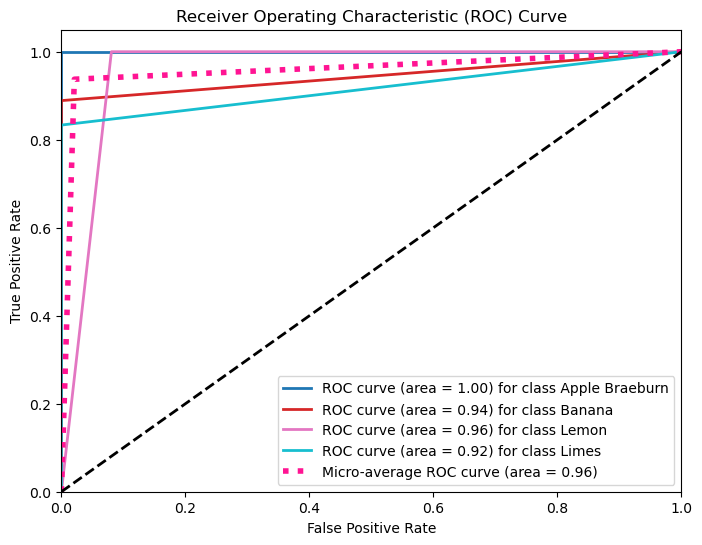

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from scipy import interp

# Function to plot ROC curve for multi-class classification
def plot_roc_curve(y_true, y_score, classes):
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('tab10', n_classes)

    for i, color in zip(range(n_classes), colors.colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {classes[i]}')

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Convert y_test and model predictions for ROC analysis
y_score = model.predict(X_test)
y_true = label_binarize(y_test.argmax(axis=1), classes=np.arange(num_classes))

# Plot ROC curve
plot_roc_curve(y_true, y_score, classes=label_encoder.classes_)


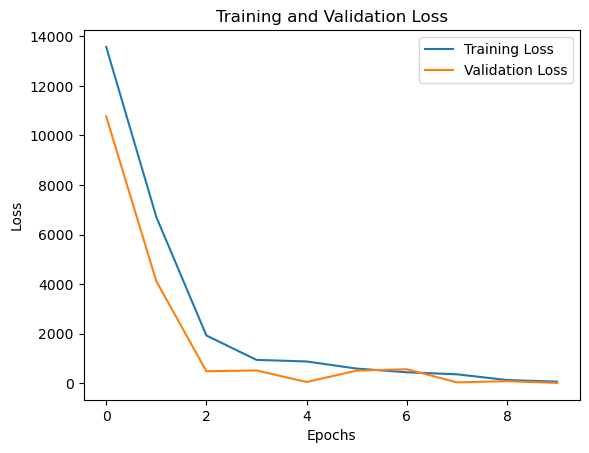

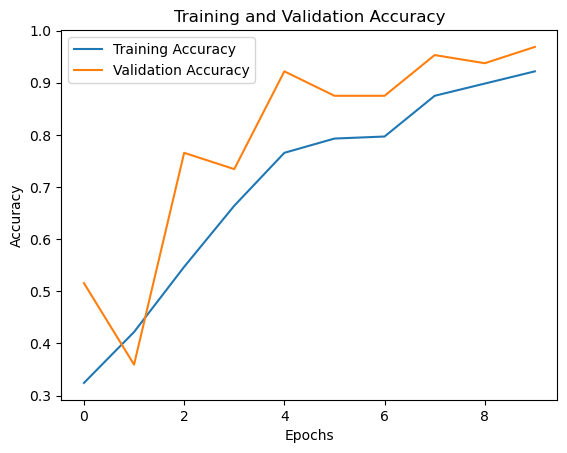

In [36]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()